### 导入必须的数学包和图形库并配置

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import pylab

### 获得未加噪声的数据（x, y），正弦函数，周期为2$\pi$，取样步长为0.1$\pi$，取一个周期

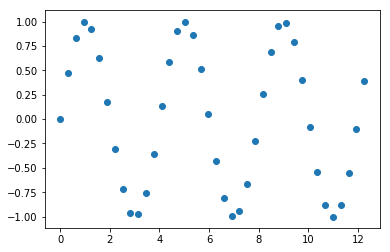

In [2]:
T = 2 * math.pi
n = 2
step = (T / n) * 0.1

x_row = np.arange(0, 2*T, step, float)

y_row = np.sin(math.pi / 2 * x_row)

plt.scatter(x_row, y_row)
plt.show()

### 为数据加上高斯白噪声，均值0，方差0.2

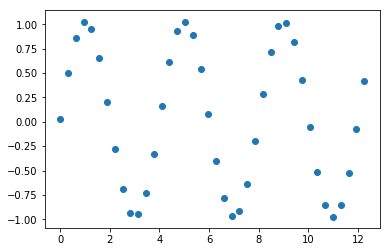

In [3]:
mu = 0
sigma = 0.2

x = x_row + random.gauss(mu, sigma)
y = y_row + random.gauss(mu, sigma)

plt.scatter(x, y)
plt.show()

### 根据最小二乘法使用1-16阶的多项式拟合数据

![](https://tva1.sinaimg.cn/large/006y8mN6ly1g6yyzo0dxrj309902kmx7.jpg)

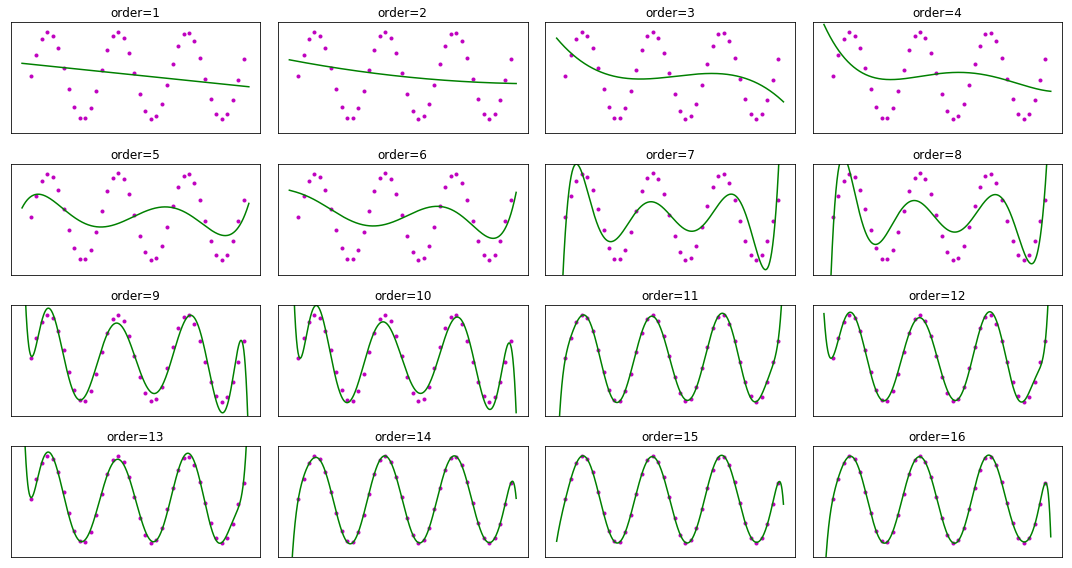

In [4]:
def least_square(x, y, order):
    matrix_left = np.empty([order + 1, order + 1], dtype = float)
    matrix_right = np.empty([order + 1, 1], dtype = float)
    for i in range(0, order + 1):
        row = matrix_left[i]
        for j in range(i, order + 1 + i):
            sum = 0
            for xx in x:
                sum = sum + xx**j
            row[j - i] = sum
    
    for i in range(0, order + 1):
        sum = 0
        j = 0
        for xx in x:
            sum = sum + y[j] * xx**i
            j = j + 1
        matrix_right[i][0] = sum
    
    return np.linalg.solve(matrix_left, matrix_right)

def func_solve(x, a):
    y=0
    for i in range(len(a)):
        y+=a[i]*x**i
    return y

pylab.rcParams['figure.figsize'] = (15.0, 8.0)
for i in range(16):
    ax = plt.subplot(4, 4, 1+i)
    ax.set_title('order=' + str(i+1))
    plt.xticks(())
    plt.yticks(())
    a = least_square(x, y, i+1)
    after_x = np.arange(-0.5, 2*T, 0.01)
    after_y = func_solve(after_x, a)
    plt.ylim([-1.3, 1.25])
    plt.plot(x, y, color='m', linestyle='', marker='.')
    plt.plot(after_x,after_y,color='g',linestyle='-',marker='')

plt.tight_layout()
plt.show()

### 120阶可观察过拟合情况

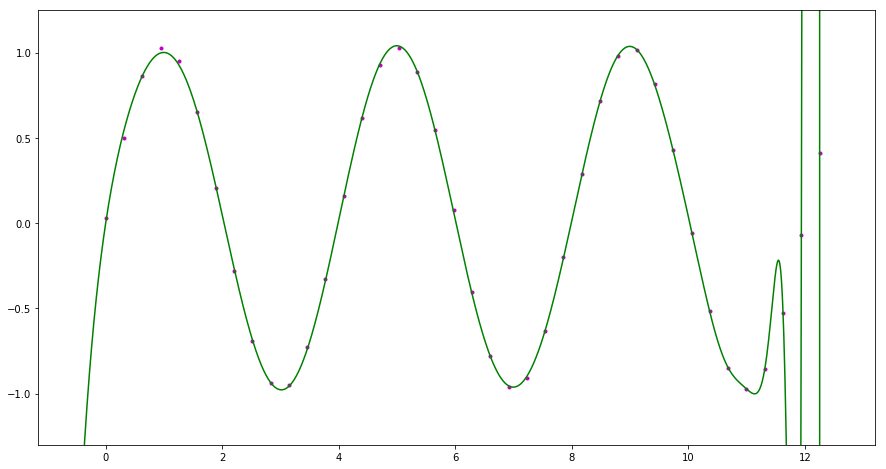

In [5]:
a = least_square(x, y, 120)
after_x = np.arange(-0.5, 2*T, 0.01)
after_y = func_solve(after_x, a)
plt.ylim([-1.3, 1.25])
plt.plot(x, y, color='m', linestyle='', marker='.')
plt.plot(after_x,after_y,color='g',linestyle='-',marker='')
plt.show()

### 最小二乘法的解析解（无正则项）
![](https://tva1.sinaimg.cn/large/006y8mN6ly1g6yy5zwc4aj304v02i0sm.jpg)

![](https://tva1.sinaimg.cn/large/006y8mN6ly1g6ywn8f1vlj3060027weg.jpg)

In [6]:
# 注意此处的x与y是样本的x和y
def analytical_solution_without_regularizer(x, y, order):
    
    matrix_left = np.ones((len(x), order+1), dtype = float)
    
    for i in range(len(x)):
        for j in range(order+1):
            matrix_left[i][j] = x[i]**j
    
    return np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(matrix_left), matrix_left)), np.transpose(matrix_left)),  np.transpose(y))

### 使用解析解拟合10阶多项式

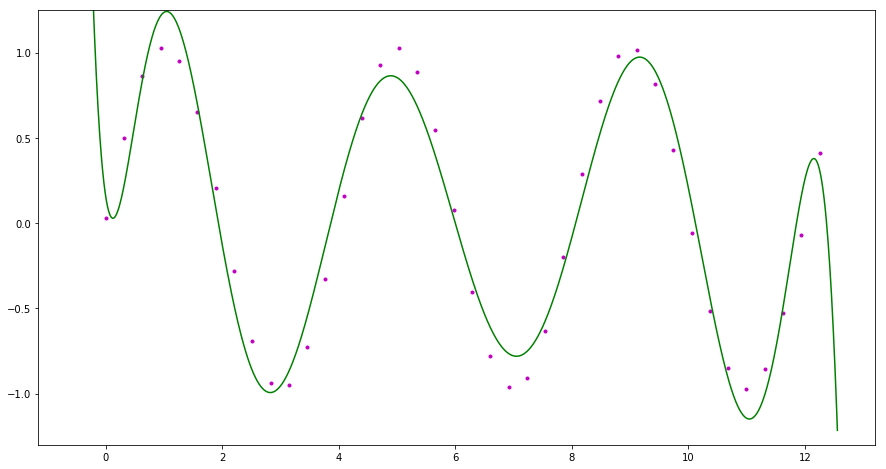

In [7]:
a = analytical_solution_without_regularizer(x, y, 10)
after_x = np.arange(-0.5, 2*T, 0.01)
after_y = func_solve(after_x, a)
plt.ylim([-1.3, 1.25])
plt.plot(x, y, color='m', linestyle='', marker='.')
plt.plot(after_x,after_y,color='g',linestyle='-',marker='')
plt.show()

### 使用有正则项的解析解（过度惩罚可能导致退化）

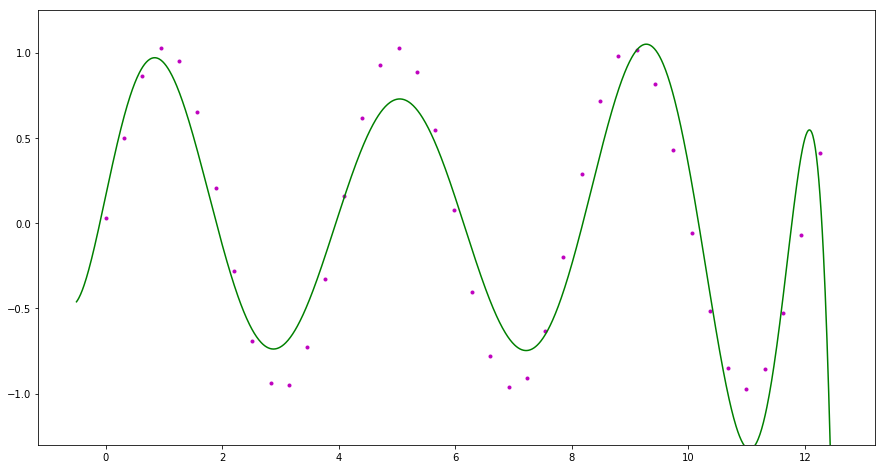

In [8]:
def analytical_solution_with_regularizer(x, y, order, regularizer):
    
    matrix_left = np.ones((len(x), order+1), dtype = float)
    
    for i in range(len(x)):
        for j in range(order+1):
            matrix_left[i][j] = x[i]**j
    
    return np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(matrix_left), matrix_left) +  regularizer * np.eye(order+1)), np.transpose(matrix_left)),  np.transpose(y))

a = analytical_solution_with_regularizer(x, y, 10, 0.1)
after_x = np.arange(-0.5, 2*T, 0.01)
after_y = func_solve(after_x, a)
plt.ylim([-1.3, 1.25])
plt.plot(x, y, color='m', linestyle='', marker='.')
plt.plot(after_x,after_y,color='g',linestyle='-',marker='')
plt.show()

### 使用梯度下降法拟合函数